
# Recuperación de Información

- Nombre: Hernán Sánchez
- Fecha: 17/12/2024


1. Realizar los siguientes ejercicios.
- Ejecutar el cógido par un corpus mas grande y en ingles.
- Especificar las etapas del Bert.


1. Tokenización y Creación del Corpus:

Aquí se carga un dataset que contiene nombres de países. El código elimina valores nulos y luego crea una lista de cadenas de texto, llamada corpus. Este es el conjunto de "documentos" sobre los cuales el modelo realizará la atención.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from nltk.corpus import stopwords
import pandas as pd

dataset_path = "/content/most-visited-countries-2024.csv"

data = pd.read_csv(dataset_path)

corpus = data['country'].dropna().tolist()
print("Nuevo corpus:")
print(corpus[:5])

Nuevo corpus:
['India', 'China', 'United States', 'Indonesia', 'Pakistan']


In [ ]:
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


2. Vectorización del Corpus:

Aquí, el código convierte las palabras del corpus en una representación numérica utilizando CountVectorizer. Además, se eliminan las stop_words. Después, se normaliza la matriz de términos, dividiendo cada fila por su norma para que todas las filas tengan una longitud unitaria.

La matriz resultante X es la matriz TF-IDF, que contiene las representaciones numéricas de los documentos en el corpus.

In [ ]:
vectorizer = CountVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(corpus).toarray()
X = X / np.linalg.norm(X, axis=1, keepdims=True)  # Normalización fila por fila
vocab = vectorizer.get_feature_names_out()

# Mostrar la matriz Término-Documento
print("Vocabulario:")
print(vocab)
print("\nMatriz Término-Documento (X):")
print(X)

Vocabulario:
['africa' 'african' 'albania' 'algeria' 'american' 'and' 'andorra'
 'angola' 'antigua' 'arab' 'arabia' 'argentina' 'armenia' 'aruba'
 'australia' 'austria' 'azerbaijan' 'bahamas' 'bahrain' 'bangladesh'
 'barbados' 'barbuda' 'belarus' 'belgium' 'belize' 'benin' 'bermuda'
 'bhutan' 'bissau' 'bolivia' 'bosnia' 'botswana' 'brazil' 'british'
 'brunei' 'bulgaria' 'burkina' 'burundi' 'caicos' 'caledonia' 'cambodia'
 'cameroon' 'canada' 'cape' 'cayman' 'central' 'chad' 'chile' 'china'
 'coast' 'colombia' 'comoros' 'congo' 'costa' 'croatia' 'cuba' 'curacao'
 'cyprus' 'czech' 'denmark' 'djibouti' 'dominica' 'dominican' 'dr'
 'ecuador' 'egypt' 'emirates' 'eritrea' 'estonia' 'eswatini' 'ethiopia'
 'faso' 'fiji' 'finland' 'france' 'french' 'gabon' 'gambia' 'georgia'
 'germany' 'ghana' 'greece' 'grenada' 'grenadines' 'guam' 'guatemala'
 'guinea' 'guyana' 'haiti' 'herzegovina' 'honduras' 'hong' 'hungary'
 'iceland' 'india' 'indonesia' 'iran' 'iraq' 'ireland' 'islands' 'israel'
 'italy' '

In [ ]:
N, d_model = X.shape  # Número de documentos y tamaño del vocabulario
num_heads = 7  # Dividir en 3 cabezas
d_k = d_model // num_heads  # Dimensión por cabeza (para simplificar)
d_k

33

3. Inicialización de los Pesos de Atención (Q, K, V):

En el modelo transformer, las matrices Q, K y V son las representaciones de la entrada que se utilizan para calcular la atención. Estas matrices son inicializadas aleatoriamente con dimensiones d_model y d_k.

In [ ]:
np.random.seed(42)  # Para reproducibilidad
W_Q = np.random.rand(d_model, d_k)
W_K = np.random.rand(d_model, d_k)
W_V = np.random.rand(d_model, d_k)
W_Q

array([[0.37454012, 0.95071431, 0.73199394, ..., 0.60754485, 0.17052412,
        0.06505159],
       [0.94888554, 0.96563203, 0.80839735, ..., 0.35675333, 0.28093451,
        0.54269608],
       [0.14092422, 0.80219698, 0.07455064, ..., 0.52273283, 0.42754102,
        0.02541913],
       ...,
       [0.00534899, 0.74823881, 0.90305065, ..., 0.12818807, 0.4253565 ,
        0.24720607],
       [0.74837525, 0.262035  , 0.88171731, ..., 0.48921625, 0.34193449,
        0.92421843],
       [0.02439099, 0.58142489, 0.54893252, ..., 0.90594397, 0.56680611,
        0.35442399]])

4. Cálculo del Producto QK^T y Escalado:

Este paso es el núcleo de la atención en el transformer. Aquí, el producto QK^T se calcula para medir la relación entre cada par de tokens. Luego, se realiza un escalado para evitar que los valores de los puntajes de atención crezcan demasiado, dividiendo por la raíz cuadrada de d_k.

In [ ]:
Q = np.dot(X, W_Q)
K = np.dot(X, W_K)
V = np.dot(X, W_V)
Q

array([[0.91454866, 0.43402097, 0.25871164, ..., 0.93271051, 0.54425397,
        0.20028202],
       [0.98778552, 0.13643975, 0.69514455, ..., 0.33300191, 0.66948696,
        0.99413936],
       [0.9501672 , 0.80113204, 0.45555033, ..., 0.56737837, 0.39185905,
        0.80252571],
       ...,
       [0.53431596, 0.97841558, 0.48004324, ..., 0.08659939, 0.39900793,
        1.28648477],
       [0.73647317, 0.05165736, 0.04929449, ..., 0.13377814, 0.95330717,
        0.07266559],
       [0.49278135, 0.16071335, 0.97826546, ..., 0.70286644, 0.06801023,
        0.19378913]])

5. Cálculo de los Pesos de Atención:

Se aplica la función softmax para convertir los puntajes escalados en probabilidades, representando los pesos de atención. Estos pesos indican la importancia de cada token respecto a los demás.

In [ ]:
# Producto QK^T
scores = np.dot(Q, K.T)
# Escalar por raíz de d_k
scaled_scores = scores / np.sqrt(d_k)
# Softmax para obtener los pesos
attention_weights = np.exp(scaled_scores) / np.sum(np.exp(scaled_scores), axis=1, keepdims=True)
# Ponderar V con los pesos
output = np.dot(attention_weights, V)
attention_weights

array([[0.00397977, 0.0033602 , 0.00734286, ..., 0.00642709, 0.00313957,
        0.0038469 ],
       [0.00381013, 0.00366455, 0.0067227 , ..., 0.00706577, 0.0039474 ,
        0.00388789],
       [0.00284695, 0.00300278, 0.008318  , ..., 0.00774035, 0.00309721,
        0.00325485],
       ...,
       [0.00372341, 0.00285952, 0.00758376, ..., 0.00829882, 0.00334546,
        0.00365008],
       [0.00348886, 0.00415183, 0.00734776, ..., 0.00593192, 0.00333184,
        0.00469141],
       [0.00391393, 0.00371171, 0.00744016, ..., 0.00675982, 0.00389525,
        0.00418044]])

6. Ponderación de los Valores (V) con los Pesos de Atención:

Una vez calculados los pesos de atención, estos se usan para ponderar los valores V, que contienen la información relevante de cada token. El resultado es una representación combinada de todos los tokens, ponderada según su relevancia mutua.

In [ ]:
output

array([[0.66785991, 0.68081532, 0.62876676, ..., 0.64487322, 0.66586573,
        0.64545414],
       [0.66243136, 0.67300887, 0.62209343, ..., 0.6346355 , 0.65387175,
        0.64181494],
       [0.70667978, 0.72738016, 0.65443026, ..., 0.68068546, 0.71132132,
        0.68325246],
       ...,
       [0.70933902, 0.73070304, 0.65291032, ..., 0.67855054, 0.70965762,
        0.68175423],
       [0.6629272 , 0.67089735, 0.61833807, ..., 0.63343032, 0.65455588,
        0.63903304],
       [0.66875629, 0.67561634, 0.6257712 , ..., 0.63734383, 0.66038724,
        0.64714911]])

7. Self-Attention:

Esta función implementa Self-Attention, donde cada token "presta atención" a todos los demás tokens en la secuencia. Básicamente, calcula los mismos pasos que vimos antes (producto, escalado, softmax, y ponderación de valores).

In [ ]:
# Definimos la función softmax
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Evitar desbordamiento numérico
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

# Función de Self-Attention
def self_attention(Q, K, V):
    d_k = Q.shape[-1]  # Dimensión de las claves (d_k)
    # 1. Producto QK^T (relaciones entre consultas y claves)
    scores = np.dot(Q, K.T)  # Dimensión: (N, N)
    # 2. Escalamiento por sqrt(d_k)
    scaled_scores = scores / np.sqrt(d_k)
    # 3. Aplicar softmax (normalización de las relaciones)
    attention_weights = softmax(scaled_scores)  # Dimensión: (N, N)
    # 4. Multiplicar por V (valores ponderados por atención)
    output = np.dot(attention_weights, V)  # Dimensión: (N, d_k)
    return output, attention_weights

8. Multi-Head Attention:


Aquí se implementa Multi-Head Attention, donde las representaciones de las consultas, claves y valores se dividen en múltiples "cabezas". Cada cabeza de atención calcula su propia atención sobre la entrada, y luego las salidas de todas las cabezas se concatenan. Finalmente, se proyecta la concatenación de las salidas a una nueva dimensión usando W_O.

In [ ]:
# Función de Multi-Head Attention
def multi_head_attention(X, W_Q, W_K, W_V, W_O, num_heads):
    """
    X: Matriz de entrada (N, d_model)
    W_Q, W_K, W_V: Matrices entrenables para Q, K, V (d_model, d_model)
    W_O: Matriz para la proyección final (d_model, d_model)
    num_heads: Número de cabezas de atención
    """
    N, d_model = X.shape
    assert d_model % num_heads == 0, "El número de cabezas debe dividir exactamente d_model"
    d_k = d_model // num_heads  # Dimensión por cabeza

    # Dividir las matrices de proyección para cada cabeza
    heads_output = []  # Lista para almacenar la salida de cada cabeza
    all_attention_weights = []  # Lista para almacenar los pesos de atención de cada cabeza
    for head in range(num_heads):
        # Proyectar las entradas en Q, K, V para esta cabeza
        Q = np.dot(X, W_Q[:, head * d_k:(head + 1) * d_k])  # Dimensión: (N, d_k)
        K = np.dot(X, W_K[:, head * d_k:(head + 1) * d_k])  # Dimensión: (N, d_k)
        V = np.dot(X, W_V[:, head * d_k:(head + 1) * d_k])  # Dimensión: (N, d_k)

        # Calcular Self-Attention para esta cabeza
        head_output, attention_weights = self_attention(Q, K, V)  # Dimensión: (N, d_k)
        heads_output.append(head_output)
        all_attention_weights.append(attention_weights)

    # Concatenar las salidas de todas las cabezas
    concatenated = np.concatenate(heads_output, axis=1)  # Dimensión: (N, d_model)

    # Aplicar proyección final
    output = np.dot(concatenated, W_O[:, :d_model])  # Aseguramos que W_O tenga la forma correcta
    return output, all_attention_weights

9. Visualización de la Atención:

Esta función visualiza los pesos de atención usando un heatmap. Permite entender cómo cada token "atiende" a otros tokens, lo cual es fundamental para ver qué partes de la secuencia son relevantes para la predicción.

In [ ]:
def visualize_attention(weights, title):
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.figure(figsize=(8, 6))
    sns.heatmap(weights, annot=True, cmap="Blues", fmt=".2f", cbar=True)
    plt.title(title)
    plt.xlabel("Keys (K)")
    plt.ylabel("Queries (Q)")
    plt.show()

In [ ]:
d_model = X.shape[1]  # Tamaño del vocabulario
# Ensure num_heads is a divisor of d_model
num_heads = 3 # Changed from 7 to 3 as it is one of the divisors of 237
print(d_model)
print(num_heads)
assert d_model % num_heads == 0, "El número de cabezas debe dividir exactamente d_model"
d_k = d_model // num_heads  # Dimensión por cabeza (d_model dividido entre num_heads)
np.random.seed(42)  # Para reproducibilidad
W_Q = np.random.rand(d_model, d_model)  # Proyección para Q
np.random.seed(43)  # Para reproducibilidad
W_K = np.random.rand(d_model, d_model)  # Proyección para K
np.random.seed(44)
W_V = np.random.rand(d_model, d_model)  # Proyección para V
np.random.seed(45)  # Para reproducibilidad
W_O = np.random.rand(d_model, d_model)  # Proyección final

237
3


In [ ]:
# Proyectar X para generar Q, K, V usando matrices entrenables
Q = np.dot(X, W_Q[:, :d_k])  # Proyección para Q (dimensión: (N, d_k))
K = np.dot(X, W_K[:, :d_k])  # Proyección para K (dimensión: (N, d_k))
V = np.dot(X, W_V[:, :d_k])  # Proyección para V (dimensión: (N, d_k))
self_attention_output, self_attention_weights = self_attention(Q, K, V)

In [ ]:
multi_head_output, multi_head_attention_weights = multi_head_attention(X, W_Q, W_K, W_V, W_O, num_heads)

In [ ]:
print("Vocabulario:", vocab)
print("\nSalida de Self-Attention:\n", self_attention_output)
print("\nSalida de Multi-Head Attention:\n", multi_head_output)

Vocabulario: ['africa' 'african' 'albania' 'algeria' 'american' 'and' 'andorra'
 'angola' 'antigua' 'arab' 'arabia' 'argentina' 'armenia' 'aruba'
 'australia' 'austria' 'azerbaijan' 'bahamas' 'bahrain' 'bangladesh'
 'barbados' 'barbuda' 'belarus' 'belgium' 'belize' 'benin' 'bermuda'
 'bhutan' 'bissau' 'bolivia' 'bosnia' 'botswana' 'brazil' 'british'
 'brunei' 'bulgaria' 'burkina' 'burundi' 'caicos' 'caledonia' 'cambodia'
 'cameroon' 'canada' 'cape' 'cayman' 'central' 'chad' 'chile' 'china'
 'coast' 'colombia' 'comoros' 'congo' 'costa' 'croatia' 'cuba' 'curacao'
 'cyprus' 'czech' 'denmark' 'djibouti' 'dominica' 'dominican' 'dr'
 'ecuador' 'egypt' 'emirates' 'eritrea' 'estonia' 'eswatini' 'ethiopia'
 'faso' 'fiji' 'finland' 'france' 'french' 'gabon' 'gambia' 'georgia'
 'germany' 'ghana' 'greece' 'grenada' 'grenadines' 'guam' 'guatemala'
 'guinea' 'guyana' 'haiti' 'herzegovina' 'honduras' 'hong' 'hungary'
 'iceland' 'india' 'indonesia' 'iran' 'iraq' 'ireland' 'islands' 'israel'
 'italy' '

10. Visualización de la Representación Vectorial Reducida con PCA:

En este paso, el código usa PCA para reducir los vectores de alta dimensión a 2 dimensiones y luego visualiza las palabras en un gráfico 2D. Cada punto en el gráfico representa una palabra, y su proximidad a otros puntos indica relaciones semánticas entre ellas. Las palabras se etiquetan cerca de sus puntos correspondientes. Esto ayuda a ver cómo las palabras están relacionadas en el espacio de vectores después de la atención multi-cabeza.


Vocabulario tiene 237 palabras
El tamaño de la salida de multi-head attention es: (203, 237)
Dimensiones de los vectores reducidos: (203, 2)


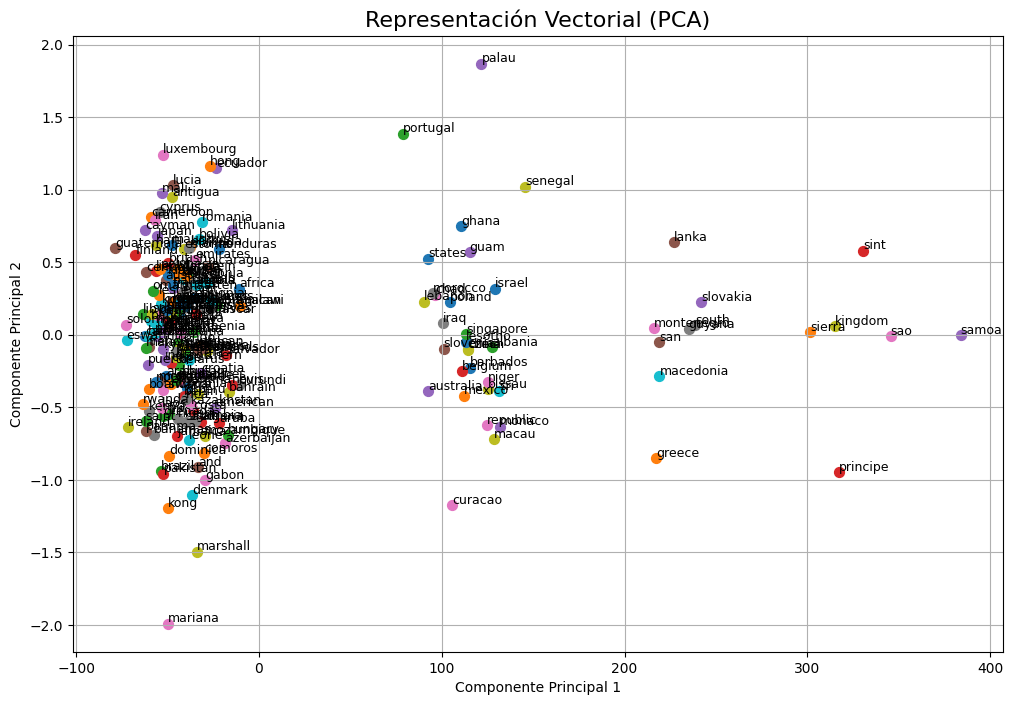

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Verificamos que las dimensiones coincidan
print(f"Vocabulario tiene {len(vocab)} palabras")
print(f"El tamaño de la salida de multi-head attention es: {multi_head_output.shape}")

# Usamos PCA para reducir la dimensionalidad a 2D
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(multi_head_output)

# Verificamos las dimensiones de los vectores reducidos
print(f"Dimensiones de los vectores reducidos: {reduced_vectors.shape}")

# Visualizamos los datos
plt.figure(figsize=(12, 8))
for i, word in enumerate(vocab):
    # Aseguramos que solo graficamos hasta el tamaño máximo
    if i < reduced_vectors.shape[0]:  # Comprobamos que no haya índice fuera de rango
        plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], label=word, s=50)
        plt.text(reduced_vectors[i, 0] + 0.01, reduced_vectors[i, 1] + 0.01, word, fontsize=9)

plt.title("Representación Vectorial (PCA)", fontsize=16)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()


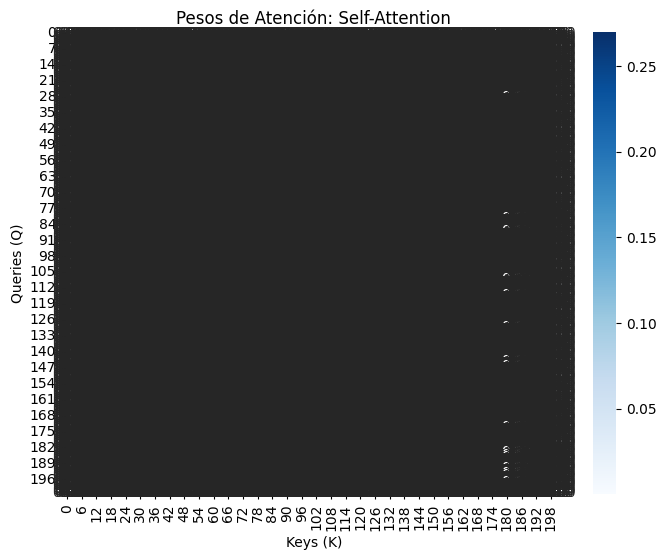

In [ ]:
visualize_attention(self_attention_weights, "Pesos de Atención: Self-Attention")

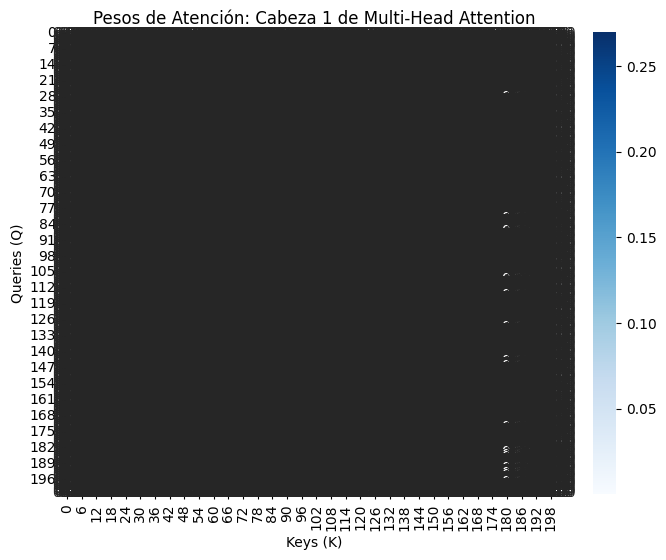

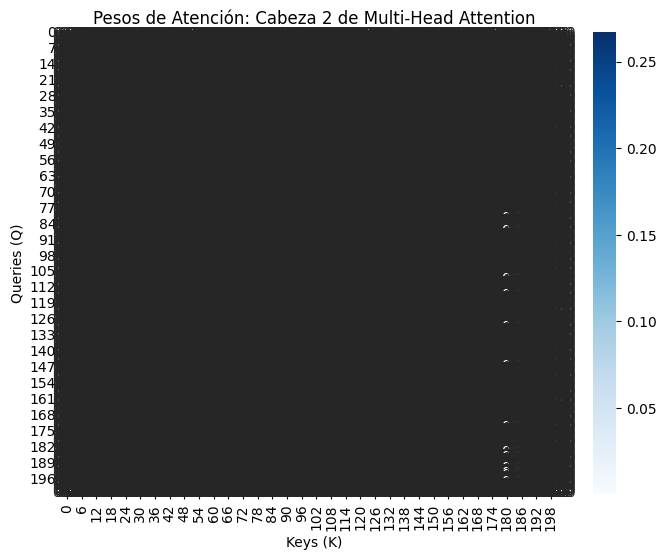

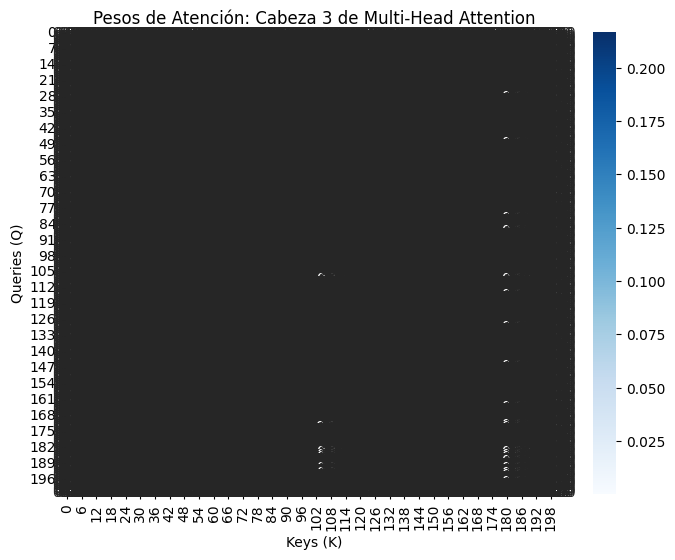

In [ ]:
for i, weights in enumerate(multi_head_attention_weights):
    visualize_attention(weights, f"Pesos de Atención: Cabeza {i + 1} de Multi-Head Attention")